## Исследование данных о российском кинопрокате



В исследовании будет изучен рынок российского кинопроката, будут выявлены текущие тренды. Также будет уделено внимание фильмам, которые получили государственную поддержу и проанализировано: насколько такие фильмы интересны зрителю.

Таблица **mkrf_movies** содержит информацию из реестра прокатных удостоверений.
- `title` — название фильма;
- `puNumber` — номер прокатного удостоверения;
- `show_start_date` — дата премьеры фильма;
- `type` — тип фильма;
- `film_studio` — студия-производитель;
- `production_country` — страна-производитель;
- `director` — режиссёр;
- `producer` — продюсер;
- `age_restriction` — возрастная категория;
- `refundable_support` — объём возвратных средств государственной поддержки;
- `nonrefundable_support` — объём невозвратных средств государственной поддержки;
- `financing_source` — источник государственного финансирования;
- `budget` — общий бюджет фильма;
- `ratings` — рейтинг фильма на КиноПоиске;
- `genres` — жанр фильма.

Таблица **mkrf_shows** содержит сведения о показах фильмов в российских кинотеатрах.
- `puNumber` — номер прокатного удостоверения;
- `box_office` — сборы в рублях.

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

Для начала откроем файлы с данными и посмотрим общую информацию о данных.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mkrf_movies = pd.read_csv('/datasets/mkrf_movies.csv')
mkrf_show = pd.read_csv('/datasets/mkrf_shows.csv')
display(mkrf_movies.head())
mkrf_show.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


In [3]:
mkrf_movies.info()
mkrf_show.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

Чтобы объединить таблицы в одну, необходимо, чтобы тип данных столбцов по которым будем объединять был одинаковым. Объединять будем по столбцу *puNumber*. Обратим внимание, что в mkrf_movies тип данных у этого столбца object, а в mkrf_show - int64. Изменим тип данных в первом датафрейме и объединим данные в новый датафрейм.

В датафрейме mkrf_movies в столбце *puNumber* встречается одна строка со словом 'нет', чтобы изменить тип данных, необходимо сначала изменить значение на '-1'.

In [4]:
mkrf_movies.loc[mkrf_movies['puNumber'] =='нет', 'puNumber'] = -1
mkrf_movies['puNumber'] = mkrf_movies['puNumber'].astype('int')
df = mkrf_movies.merge(mkrf_show, on='puNumber', how='left')

In [5]:
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Мы объединили данные в один датафрейм таким образом, чтобы все объекты из датасета mkrf_movies обязательно вошли в получившийся датафрейм и добавился столбец *box_office*. Судя по общему количеству строк (7486), все строки из mkrf_movies вошли в получившийся датафрейм, в столбце *box_office* 3158 строк, что значит что все данные из mkrf_show тоже вошли в получившийся датафрейм.

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

В столбце *show_start_date* необходимо поменять тип данных на datetime64 для удобства работы с датой.
В столбце *ratings* необходимо поменять тип данных на float64 для удобства работы с рейтингом.

In [8]:
df['show_start_date'] = pd.to_datetime(df['show_start_date'], format='%Y-%m-%dT%H:%M:%S.000Z')

В столбце *ratings* некоторые значения указаны в процентах. Минимальное значение в процентах 19%. Уберем значек процента, переведем тип данных во float64 и все значения больше 10 поделим на 10.

In [9]:
display(df['ratings'].sort_values().head(20))
df.loc[df['ratings'].isna() == False, 'ratings'].sort_values().tail(10)

3515    1.0
4678    1.1
1535    1.1
4794    1.2
4014    1.3
1025    1.4
5243    1.4
1468    1.5
1226    1.5
3374    1.5
515     1.6
1473    1.6
1472    1.6
6830    1.6
1691    1.6
6505    1.7
5135    1.7
4346    1.8
4323    1.9
3431    19%
Name: ratings, dtype: object

5910    94%
1053    97%
3948    97%
3585    97%
6616    98%
6737    98%
1805    99%
259     99%
1341    99%
6882    99%
Name: ratings, dtype: object

In [10]:
df['ratings'] = df['ratings'].str.replace('%', '')
df['ratings'] = pd.to_numeric(df['ratings'])
df.loc[df['ratings'] > 10, 'ratings'] /= 10

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7486 non-null   object        
 1   puNumber               7486 non-null   int64         
 2   show_start_date        7486 non-null   datetime64[ns]
 3   type                   7486 non-null   object        
 4   film_studio            7468 non-null   object        
 5   production_country     7484 non-null   object        
 6   director               7477 non-null   object        
 7   producer               6918 non-null   object        
 8   age_restriction        7486 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

Тип данных в столбцах *show_start_date, ratings* изменен. Теперь тип данных во всех столбцах корректен.

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

Для начала изучим пропуски.

In [12]:
df.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64

In [13]:
(df['director'] == df['producer']).sum()

329

В столбцах *film_studio, production_country* пропуски заполнить никак нельзя, кроме как 'не указано'.

В столбце *director* можно заполнить пропуск значением из столбца *producer*, так как строк с одинаковым значением продюсера и режиссера 98. Если режисер или продюсер не указан, то скорей всего это один и тот же человек.

В столбце *producer* можно заполнить пропуск значение из столбца *director*, так как строк с одинаковым значением продюсера и режиссера 98. Если режисер или продюсер не указан, то скорей всего это один и тот же человек.

В столбцах *refundable_support, nonrefundable_support, financing_source* пропуски стоят там, где нет государственной поддержки, соответственно можно заполнить первые 2 столбца нулями, а в третьем написать 'нет государственной поддержки'.

В столбце *budget* вместо пропусков поставим сумму *refundable_support и nonrefundable_support*. 

В столбце *genres* пропуски заполнить никак нельзя, кроме как 'не указано'.

В столбце *ratings* пропуски заполнять не будем для удобства работы с данными.

В столбце *box_office* пропуски появились потому, что в mkrf_movies было больше строк чем в mkrf_show. Для удобства работы с данными, пропуски в этом столбце заполнять не будем.

In [14]:
df['director'] = df['director'].fillna(df['producer'])
df['producer'] = df['producer'].fillna(df['director'])
df['refundable_support'] = df['refundable_support'].fillna(0)
df['nonrefundable_support'] = df['nonrefundable_support'].fillna(0)
df['budget'] = df['budget'].fillna(df['nonrefundable_support'] + df['refundable_support'])
df['financing_source'] = df['financing_source'].fillna('нет государственной поддержки')

In [15]:
columns = ['film_studio', 'production_country', 'genres']
for column in columns:
    df[column] = df[column].fillna('не указано')

In [16]:
df.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                 0
production_country          0
director                    4
producer                    4
age_restriction             0
refundable_support          0
nonrefundable_support       0
budget                      0
financing_source            0
ratings                   967
genres                      0
box_office               4328
dtype: int64

Все пропуски в столбцах *refundable_support, nonrefundable_support, budget, financing_source, film_studio, production_country, genres* заполнены. В столбцах *director* и *producer* осталось по 4 пропуска, это пропуски в строках где не указано ни режиссера, ни продюссера. Заполним такие строки значением 'не указано'.

In [17]:
df['director'] = df['director'].fillna('не указано')
df['producer'] = df['producer'].fillna('не указано')

In [18]:
df.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                 0
production_country          0
director                    0
producer                    0
age_restriction             0
refundable_support          0
nonrefundable_support       0
budget                      0
financing_source            0
ratings                   967
genres                      0
box_office               4328
dtype: int64

Теперь все пропуски во всех столбцах кроме *box_office и ratings* заполнены.

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

Для начала проверим количество полных дубликатов.

In [19]:
df.duplicated().sum()

0

Полных дубликатов нет, но может есть дубликаты в названии фильмов.

In [20]:
print(df['title'].duplicated().sum())
df[df['title'].duplicated()]

714


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,0.0,нет государственной поддержки,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,0.0,нет государственной поддержки,6.8,"фантастика,боевик,триллер",NaN
41,Алекс и Эмма,221004616,2016-02-09 12:00:00,Художественный,"Эскейп Артистс, Франчайз Пикчерз, Рейнер-Грэйс...",США,Роб Райнер,"Тодд Блэк, Элан Грейсман, Джереми Левен, Роб Р...",«16+» - для детей старше 16 лет,0.0,0.0,0.0,нет государственной поддержки,6.4,"мелодрама,комедия",NaN
110,Гарри Поттер и орден Феникса /По роману Дж.К.Р...,121026316,2016-09-23 12:00:00,Художественный,"Уорнер Бразерс, Хэйдей Филмз",США - Великобритания,Дэвид Йетс,"Дэйвид Баррон, Дэйвид Хейман",«16+» - для детей старше 16 лет,0.0,0.0,0.0,нет государственной поддержки,7.7,"фэнтези,приключения,семейный",759526.00
113,Гарри Поттер и узник Азкабана /По роману Дж.К....,121026116,2016-09-23 12:00:00,Художественный,"Хэйдей Филмз, 1492 Пикчерз, Уорнер Бразерс",США,Альфонсо Куарон,Майкл Барната,«12+» - для детей старше 12 лет,0.0,0.0,0.0,нет государственной поддержки,8.2,"фэнтези,приключения,семейный",1125302.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7369,Невиновен,111019319,2019-11-07 12:00:00,Художественный,"ООО ""Кавказфильм""",Россия,А.Емкужев,"А.Емкужев, А.Хуажева, ООО ""Корпорация Русская ...",«16+» - для детей старше 16 лет,0.0,0.0,0.0,нет государственной поддержки,7.5,"триллер,детектив,криминал",NaN
7416,"Отель ""Гранд Будапешт""",121035119,2019-12-13 12:00:00,Художественный,"Американ Эмпирикал, Индиан Пэинтбраш, Скотт Ру...","Германия, США",Уэс Андерсен,"Уэс Андерсон, Джереми Доусон, Стивен Рейлс",«16+» - для детей старше 16 лет,0.0,0.0,0.0,нет государственной поддержки,7.9,"комедия,приключения,детектив",NaN
7438,Зверь,121035919,2019-12-05 12:00:00,Художественный,Студио энд Нью,Южная Корея,Ли Джон-хо,"Чан Гён-ик, Чон Джи-хун, Пэк Кён сук",«18+» - запрещено для детей,0.0,0.0,0.0,нет государственной поддержки,6.5,"триллер,драма",175003.51
7450,В тихом омуте,121036919,2019-12-09 12:00:00,Художественный,"Хэд Гир Филмз, Крео Филмз, Локал Хироу, Метрол...",США,Адам Рэндолл,Мэтт Уолдек,«18+» - запрещено для детей,0.0,0.0,0.0,нет государственной поддержки,6.8,"триллер,криминал,детектив",NaN


714 фильмов с одинаковыми названиями. Посмотрим чем же они отличаются друг от друга.

In [21]:
df[df['title'] == 'Особо опасен']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,0.0,нет государственной поддержки,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,0.0,нет государственной поддержки,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,0.0,нет государственной поддержки,6.8,"фантастика,боевик,триллер",NaN


3 фильма "Особо опасен". Номер прокатного удостоверения и дата премьеры у всех разные. Это значит, что это три разных фильма, возможно какой-то из них это расширенная версия другого.

Посмотрим, есть ли фильмы с одинаковым номером прокатного удостоверения.

In [22]:
df[df['puNumber'].duplicated()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,0.0,0.0,0.0,нет государственной поддержки,7.6,"драма,мелодрама,история",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,0.0,0.0,0.0,нет государственной поддержки,6.8,"комедия,криминал",NaN


In [23]:
display(df[df['puNumber'] == 221154310])
df[df['puNumber'] == 221054410]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,0.0,0.0,0.0,нет государственной поддержки,7.0,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,0.0,0.0,0.0,нет государственной поддержки,7.6,"драма,мелодрама,история",NaN


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5067,Анализируй это!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,0.0,0.0,0.0,нет государственной поддержки,7.4,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,0.0,0.0,0.0,нет государственной поддержки,6.8,"комедия,криминал",NaN


У первых дубликатов разное название, жанры и другое, судя по всему это разные фильмы, но странно, что у них одинаковый номер прокатного удостоверения, возможно их показывают вместе.

У вторых дубликатов названия отличаются на одну букву, по разному написано имя режиссера, указаны разные страны производства, разные возрастные ограничения и рейтинг, но одинаковая дата премьеры, жанры и другое. Это определенно один и тот же фильм, один из них необходимо удалить, оставим тот который встречается первый потому, что у него есть расширенная версия а второго нет.

In [24]:
display(df[df['title'] == 'Анализируй это!'])
df[df['title'] == 'Анализируй то!']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4553,Анализируй это!,221147310,2010-12-15 12:00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,0.0,0.0,0.0,нет государственной поддержки,7.4,"комедия,криминал",NaN
5067,Анализируй это!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,0.0,0.0,0.0,нет государственной поддержки,7.4,"комедия,криминал",NaN


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5068,Анализируй то!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,0.0,0.0,0.0,нет государственной поддержки,6.8,"комедия,криминал",NaN


In [25]:
df = df.loc[df['title'] != 'Анализируй то!']

Как и ожидалось у всех фильмов с одинаковыми названиями разные даты выхода и номер прокатного удостоверения. Это значит, что это разные фильмы, например один является расширенной версией другого. А вот один из двух дубликатов в столбце *puNumber* оказался одним и тем же фильмом.

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

Для начала изучим уникальные значения в категориальных столбцах.

In [26]:
columns = ['type', 'production_country', 'age_restriction', 'financing_source', 'genres']
for column in columns:
    display(df[column].unique())

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания', 'Великобритания - Италия',
       'Чехословакия', 'США - Франция - Турция', 'Новая Зеландия',
       'Канада - Франция - Испания', 'США-Германия',
       'США - Великобритания', 'Великобритания', 'США - Германия',
       'Франция - Мексика - США', 'Россия, Казахстан, США',
       'СССР, Швеция', 'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США - Франция', 'США - Япония - Франция - Великобритания',
       'Гонконг - Сингапур - Таиланд - Великобритания', 'США-Канада',
       'Франция - Италия - Великобритания - США', 'Франция - США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР, Финляндия', 'США-Франция-Великобритания-Австрия',
       'США - Бельгия', 'США - Ирландия - Великобритания',
       'Великобритания - США',
       'Люксембург - Нидерл

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

array(['нет государственной поддержки', 'Министерство культуры',
       'Фонд кино', 'Министерство культуры, Фонд кино'], dtype=object)

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', 'не указано', 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'ко

В столбце *type* необходимо убрать пробелы перед некоторыми значениями.

В столбце *production_country*, где указано сразу несколько стран, некоторые страны записаны через запятую, а некоторые через тире, некоторые через пробел, а некоторые нет, также встречаются одинаковые страны, но в разном порядке например 'США - Великобритания' и 'Великобритания - США'.

В столбце *age_restriction* всё хорошо.

В столбце *financing_source* всё хорошо.

В столбце *genres* встречаются одинаковые жанры, записанные в разном порядке.

In [27]:
df['type'] = df['type'].str.replace(' ', '')
df['production_country'] = df['production_country'].str.replace('-', ',')
df['production_country'] = df['production_country'].str.replace(' ', '')
columns = ['type', 'production_country']
for column in columns:
    display(df[column].unique())

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

array(['США', 'СССР', 'Франция', 'СССР,Венгрия',
       'Германия,Великобритания', 'Великобритания,Италия', 'Чехословакия',
       'США,Франция,Турция', 'НоваяЗеландия', 'Канада,Франция,Испания',
       'США,Германия', 'США,Великобритания', 'Великобритания',
       'Франция,Мексика,США', 'Россия,Казахстан,США', 'СССР,Швеция',
       'СССР,Франция,Англия,Куба,ГДР', 'Германия',
       'Великобритания,США,Германия,КНР', 'СССР,ЧССР,ЗападныйБерлин,ПНР',
       'СССР,Италия', 'Гонконг,КНР', 'США,Франция',
       'США,Япония,Франция,Великобритания',
       'Гонконг,Сингапур,Таиланд,Великобритания', 'США,Канада',
       'Франция,Италия,Великобритания,США', 'Франция,США',
       'Ирландия,Великобритания,Германия', 'Чехия', 'США,Австралия',
       'СССР,Финляндия', 'США,Франция,Великобритания,Австрия',
       'США,Бельгия', 'США,Ирландия,Великобритания', 'Великобритания,США',
       'Люксембург,Нидерланды,Испания,Великобритания,США,Италия',
       'Великобритания,Франция,США', 'НоваяЗеландия,США

В столбце *type* мы убрали пробелы.

В столбце *production_country* мы заменили дефисы на запятые и также убрали пробелы.

Тем самым мы избавились от неявных дублей в этих столбцах.

В некоторых столбцах, встречаются строки с одинаковым значением, записанным в разных порядках. Первое указанное значение в таких строках является основным, поэтому местами менять их не надо.

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

Проверим количественные значения.

Обратим внимание на столбцы *budget, refundable_support, nonrefundable_support*. В столбце *budget* общий бюджет фильма, значит он не может быть меньше суммы государственной поддержки.

In [28]:
print((df['budget'] < (df['refundable_support'] + df['nonrefundable_support'])).sum())
df[df['budget'] < (df['refundable_support'] + df['nonrefundable_support'])]

17


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,23000000.0,0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,1.023402e+07
2058,Дуxless 2,111000415,2015-01-26 12:00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,75000000.0,0.0,Фонд кино,6.6,драма,4.461635e+08
2472,Воин (2015),111017315,2015-09-28 12:00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.0,70000000.0,0.0,Фонд кино,7.8,"боевик,драма,криминал",1.965724e+08
2532,Бармен.,111009615,2015-05-26 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.0,0.0,0.0,Фонд кино,6.2,"комедия,фэнтези",6.741897e+07
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.0,100000000.0,0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",1.844876e+08
2684,Тряпичный союз,111010215,2015-06-08 12:00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.0,59000000.0,0.0,Фонд кино,6.3,"комедия,драма",1.957739e+06
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,35000000.0,0.0,Фонд кино,5.1,"комедия,мелодрама",7.293778e+07
2874,Помню - не помню!,111004916,2016-03-01 12:00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.0,6000000.0,0.0,Министерство культуры,4.3,комедия,1.536293e+07
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.0,51000000.0,0.0,Фонд кино,6.3,"комедия,мелодрама",7.029905e+07
3565,Притяжение (2016),111018116,2016-12-16 12:00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.0,250000000.0,0.0,Фонд кино,5.6,фантастика,1.038321e+09


Строк, где бюджет меньше суммы государственной поддержки 17. Заменим значение бюджета в этих строках на сумму государственной поддержки.

In [29]:
df.loc[df['budget'] < (df['refundable_support'] + df['nonrefundable_support']),
       'budget'] = df['refundable_support'] + df['nonrefundable_support']

В таких строках бюджет был равен 0, возможно имелся ввиду собственный бюджет.

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [30]:
df['year'] = df['show_start_date'].dt.year

In [31]:
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0.0,0.0,0.0,нет государственной поддержки,7.2,"боевик,драма,мелодрама",NaN,2015
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Е.Матвеев,«6+» - для детей старше 6 лет,0.0,0.0,0.0,нет государственной поддержки,6.6,"драма,военный",NaN,2016
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,0.0,нет государственной поддержки,6.8,"фантастика,боевик,триллер",NaN,2016
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,0.0,нет государственной поддержки,6.8,"фантастика,боевик,триллер",NaN,2016
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,0.0,нет государственной поддержки,6.8,"фантастика,боевик,триллер",NaN,2015


- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [32]:
df['head_director'] = 0 # создаем новые столбцы 
df['main_genre'] = 0 

i = 0 # счетчик
for item in df['director'].str.split(','): # изменяем значения новых столбцов
    df['head_director'].iloc[i] = item[0]
    i += 1  
i = 0 # обнуляем счетчик
for item in df['genres'].str.split(','): 
    df['main_genre'].iloc[i] = item[0]
    i += 1
    
df.head()

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,head_director,main_genre
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0.0,0.0,0.0,нет государственной поддержки,7.2,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Е.Матвеев,«6+» - для детей старше 6 лет,0.0,0.0,0.0,нет государственной поддержки,6.6,"драма,военный",NaN,2016,Е.Матвеев,драма
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,0.0,нет государственной поддержки,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,0.0,нет государственной поддержки,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,0.0,нет государственной поддержки,6.8,"фантастика,боевик,триллер",NaN,2015,Тимур Бекмамбетов,фантастика


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [33]:
df['support_part'] = ((df['refundable_support'] + df['nonrefundable_support']) / df['budget']).round(2)
df['support_part'] = df['support_part'].fillna(0) # значение NaN получат фильмы с общим бюджетом 0, соответственно и
# государственная поддержка у таких фильмов равна 0, поэтому запишем долю равной 0
df[df['support_part'] != 0].head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,head_director,main_genre,support_part
1281,Пока еще жива,111005313,2013-10-11 12:00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,26500000.0,79411900.0,Министерство культуры,8.1,"драма,мелодрама",365353.6,2013,А.Атанесян,драма,0.33
1448,Бесславные придурки,111003314,2014-03-28 12:00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,26000000.0,37142857.0,Министерство культуры,NaN,не указано,28140.0,2014,А.Якимчук,не указано,0.70
1498,Невидимки,111004213,2013-09-10 12:00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,107847945.0,176023490.0,Фонд кино,5.3,"комедия,фантастика",19957031.5,2013,Р.Давлетьяров,комедия,0.61
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,28000000.0,40574140.0,Министерство культуры,4.2,драма,55917.5,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,0.69
1792,Братья Ч,111004414,2014-04-23 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,25000000.0,40015122.0,Министерство культуры,6.4,драма,232100.0,2014,М.Угаров,драма,0.62


Добавлено 4 новых столбца - *year, head_director, main_genre, support_part*.

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируйте, как эта доля менялась по годам. Сделайте вывод о том, какой период полнее всего представлен в данных.

Посмотрим сколько фильмов выходило в прокат каждый год. Сведения о показах фильмов в российских кинотеатрах содержала таблица mkrf_shows, поэтому надо посчитать количество фильмов на каждый год у которых сборы в рублях известны. 

In [34]:
df.groupby('year')['box_office'].count()

year
2010    105
2011    109
2012    128
2013    184
2014    279
2015    465
2016    526
2017    357
2018    475
2019    530
Name: box_office, dtype: int64

В каждом году кроме 2017 количество фильмов, показнных в российских кинотеатрах возрастало по сравнению с предыдущим годом.

Посчитаем какую долу составляют фильмы с указанной информацией о пракате в кинотеатрах.

In [35]:
df['box_office'].count() / (df['box_office'].count() + df['box_office'].isna().sum())

0.42191048764195055

42% фильмов с указанной информацией, остальные - нет.

Посмотрим как эта доля менялась по годам.

In [36]:
years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
for year in years:
    print('Доля фильмов с указанной информацией в', year, 'году составила', 
          (df.loc[df['year'] == year, 'box_office'].count() / (df['year'] == year).sum()).round(2))

Доля фильмов с указанной информацией в 2010 году составила 0.11
Доля фильмов с указанной информацией в 2011 году составила 0.18
Доля фильмов с указанной информацией в 2012 году составила 0.22
Доля фильмов с указанной информацией в 2013 году составила 0.29
Доля фильмов с указанной информацией в 2014 году составила 0.35
Доля фильмов с указанной информацией в 2015 году составила 0.66
Доля фильмов с указанной информацией в 2016 году составила 0.64
Доля фильмов с указанной информацией в 2017 году составила 0.71
Доля фильмов с указанной информацией в 2018 году составила 0.53
Доля фильмов с указанной информацией в 2019 году составила 0.57


Период с 2010 по 2012 полнее всего представлен в данных.

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

Для изучения динамики суммы сборов по годам построим таблицу и график.

,box_office
year,
2010,2.428654e+06
2011,1.410276e+07
2012,6.955423e+06
2013,2.979971e+07
2014,7.444952e+09
2015,3.949737e+10
2016,4.786630e+10
2017,4.856371e+10
2018,4.966840e+10


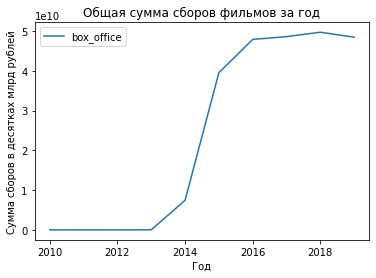

In [37]:
display(df.pivot_table(index='year', values='box_office', aggfunc='sum').round())
(df.pivot_table(index='year', values='box_office', aggfunc='sum').
 plot(xlabel='Год', ylabel='Сумма сборов в десятках млрд рублей', title='Общая сумма сборов фильмов за год'))
plt.show()

По графику видна огромная разница в сумме сборов между 2016 - 2019 годами и 2010 - 2013 годами. Сумма сборов была минимальной в 2010 году, а максимальной в 2018 году.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [38]:
df.pivot_table(index='year', values='box_office', aggfunc=['mean', 'median']).round()

,mean,median
,box_office,box_office
year,,
2010,23130.0,1700.0
2011,129383.0,3000.0
2012,54339.0,5660.0
2013,161955.0,3522.0
2014,26684415.0,18160.0
2015,84940570.0,4920933.0
2016,91000570.0,3846679.0
2017,136032793.0,9968340.0


Среднее значение во все года сильно выше медианного значения, это значит, что в каждом году фильмов, которые собрали относительно мало денег с показов больше, чем фильмов, которые собрали много денег с показов.

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

«0+» - для любой зрительской аудитории
Общая сумма сборов с 2015 по 2019 год составила 809077426.0


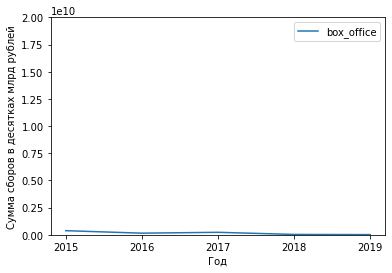

«6+» - для детей старше 6 лет
Общая сумма сборов с 2015 по 2019 год составила 55798610800.0


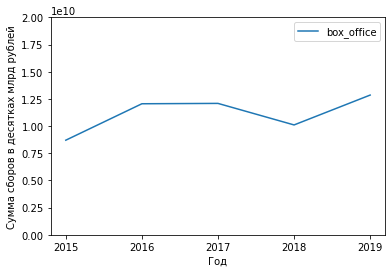

«12+» - для детей старше 12 лет
Общая сумма сборов с 2015 по 2019 год составила 60619446628.0


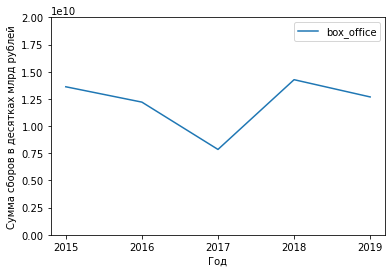

«16+» - для детей старше 16 лет
Общая сумма сборов с 2015 по 2019 год составила 76034733644.0


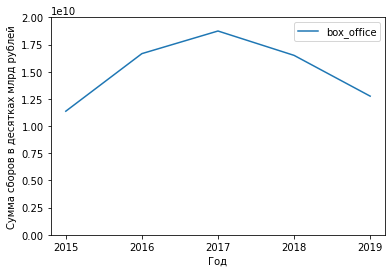

«18+» - запрещено для детей
Общая сумма сборов с 2015 по 2019 год составила 40759615572.0


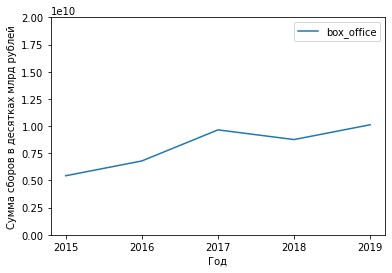

In [39]:
ages = ['«0+» - для любой зрительской аудитории', '«6+» - для детей старше 6 лет', '«12+» - для детей старше 12 лет',
        '«16+» - для детей старше 16 лет', '«18+» - запрещено для детей']
years = [2015, 2016, 2017, 2018, 2019]
for age in ages:
    print(age)
    total_box_office = df.loc[(df['age_restriction'] == age) & (df['year'].isin(years)), 'box_office'].sum().round()
    print('Общая сумма сборов с 2015 по 2019 год составила', total_box_office)
    (df[(df['age_restriction'] == age) & (df['year'].isin(years))].pivot_table(index='year', values='box_office', aggfunc='sum')
     .plot(ylim=(0, 20000000000), xlabel='Год', ylabel='Сумма сборов в десятках млрд рублей'))
    plt.xticks(range(2015,2020))
    plt.show()

Возрастное ограничение аудитори сильно влияет на сборы фильма в прокате с 2015 по 2019 год. 

Фильмы с возрастным ограничением "16+" собрали в прокате 76 млрд рублей. А фильмы с возрастным ограничением "0+" собрали 809 млн рублей.

В 2015 году больше всего собрали фильмы с возрастным ограничением "12+", с 2016 по 2018 - "16+", а в 2019 - примерно одинаковую сумму денег собрали "6+", "12+" и "16+". Это можно быть с выходом самых ожидаемых фильмов "16+" в период с 2016 по 2018 года или тем, что фильмов для "16+" стали делать больше в этот период.

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

Для начала посмотрим сколько в сумме выделяют денег на поддержку фильмов ежегодно. Для этого добавим столбец с общей суммой государственной поддержки.

<AxesSubplot:xlabel='year'>

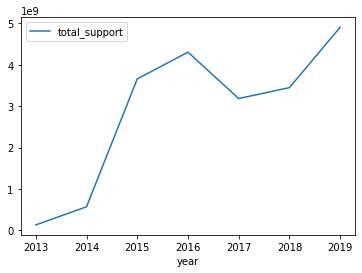

In [40]:
df['total_support'] = df['refundable_support'] + df['nonrefundable_support']
df[df['total_support'] != 0].pivot_table(index='year', values='total_support', aggfunc='sum').plot()

Государственную поддержку начали давать с 2013 года. До 2016 года общая сумма государственной поддержки росла.

Посмотрим на динамику средней государственной поддержки.

<AxesSubplot:xlabel='year'>

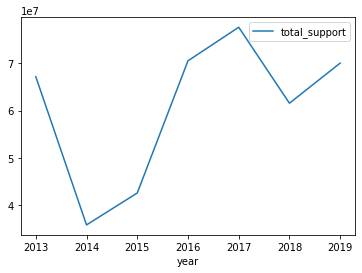

In [41]:
df[df['total_support'] != 0].pivot_table(index='year', values='total_support').plot()

Средняя государственная поддержка росла с 2014 по 2017 года.

Теперь посмотрим на средний рейтинг фильмов с поддержкой и без неё по годам.

Рейтинг фильмов с поддержкой


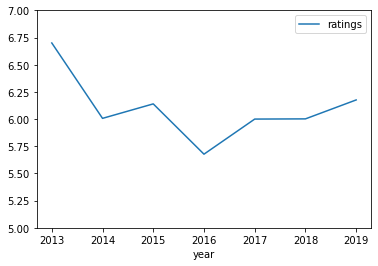

Рейтинг фильмов без поддержки


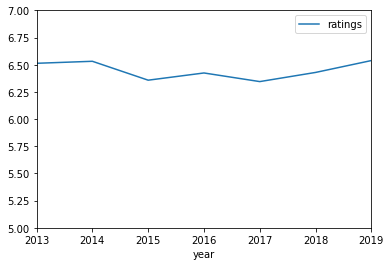

In [42]:
print('Рейтинг фильмов с поддержкой')
df[df['total_support'] != 0].pivot_table(index='year', values='ratings').plot(ylim=(5, 7))
plt.show()
print('Рейтинг фильмов без поддержки')
df[df['total_support'] == 0].pivot_table(index='year', values='ratings').plot(xlim=(2013, 2019), ylim=(5, 7))
plt.show()

В 2013 году фильмы с поддержкой зрителям нравились больше, чем остальные. В 2014 - 2019 года - меньше.

Посмотрим, хорошо ли окупаются фильмы с государственной поддержкой.

In [43]:
(df[df['nonrefundable_support'] != 0].pivot_table(index='year', values=['nonrefundable_support', 'box_office', 'total_support'])
 .round())

,box_office,nonrefundable_support,total_support
year,,,
2013,10161193.0,67173972.0,67173972.0
2014,63588885.0,31312644.0,35750144.0
2015,69351651.0,36818150.0,43015140.0
2016,101361797.0,55436975.0,70543532.0
2017,264103815.0,63195507.0,79076196.0
2018,170121821.0,50635808.0,60581263.0
2019,135432905.0,58470588.0,70132353.0


Судя по таблице не окупились фильмы только в 2013 году, в 2014 - 2019 года фильмы окупались в 2-4 раза.

Теперь сравним средние суммы сборов фильмов с поддержкой и без неё по годам.

In [44]:
df[(df['total_support'] == 0) & (df['year'] >= 2013)].pivot_table(index='year', values=['box_office']).round()

,box_office
year,
2013,52073.0
2014,24439276.0
2015,88715999.0
2016,89666506.0
2017,118549157.0
2018,94831346.0
2019,85140599.0


В 2013 - 2014, 2016 - 2019 годах средняя сумма сборов фильмов с поддержкой выше чем без неё.

В 2015 году средняя сумма сборов фильмов без поддержки выше чем с поддержкой.

### Шаг 5. Напишите общий вывод

В 2010 - 2016, 2018 - 2019 количество фильмов, показнных в российских кинотеатрах возрастало по сравнению с предыдущим годом.

Средняя сумма сборов с 2012 по 2017 года росла и выросла в 2500 раз.

В 2015 году наиболее популярными были фильмы с возрастным ограничением "12+", с 2016 по 2018 - "16+", а в 2019 - одинаково популярными были фильмы со следующими возрастными ограничениями "6+", "12+" и "16+". Фильмы "0+" с 2015 по 2019 года были практически не популярны, а фильмы "18+" становились популярнее с каждым годом, кроме 2018, в 2019 году они были на 25% менее популярны, чем фильмы со следующими возрастными ограничениями "6+", "12+" и "16+".

Фильмы с государственной поддержкой начали появляться в 2013 году. До 2016 года общая сумма государственной поддержки росла. Средняя сумма государственной поддержки тоже росла в период с 2014 по 2017 года. Фильмы с поддержкой нравились зрителям в 2013 году больше, чем без неё, в остальные годы - меньше. Фильмы с поддержкой в 2013 году не окупились, а в 2014 - 2019 года окупались в 2-4 раза. 